Ciência das Redes
Thiago H Silva

# Exercício 2

aluno: Danilo Gazzoli Resende

## 1- Visualize a rede “GraphMissingEdges.gml” (referente ao desafio no Kaggle) com o layout ForceAtlas2.

![alt text](rede-gephi.png "Rede Graph Missing Edges - layout ForceAtlas2")

## 2- Crie uma rede aleatória Erdos-Renyi com N=3000 e com probabilidade p=10 -3 de dois nós aleatórios se conectarem. Em seguida responda:


In [1]:
import matplotlib.pyplot as plt
import networkx as nx

n = 3000
p = 10 ** -3  # probabilidade
seed = 20160 

G = nx.erdos_renyi_graph(n, p, seed=seed)


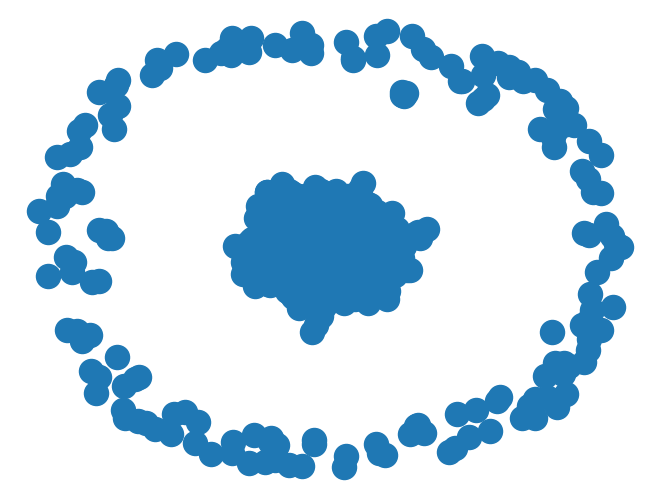

In [2]:
pos = nx.spring_layout(G, seed=seed)
nx.draw(G, pos=pos)
plt.show()

a) Qual o número de links esperado? 

In [3]:
G.number_of_edges()

4538

In [6]:
M = (n*(n-1)*p)/2
print(f"Número esperado de links: {M} ")

Número esperado de links: 4498.5 


Isso vai de acordo com o que foi observado na rede criada?

Sim, está de acordo uma vez que o número de arestas real (4538) é próximo ao esperado (4498)

b) Em qual regime essa rede se encontra, subcritical, critical, supercritical ou conected? Justifique.


In [9]:
k_medio = p*(n-1)

if k_medio < 1:
    print("Subcritical")
elif k_medio == 1:
    print("Critical")
elif k_medio < (n/10): # N > 1 and N < 300 (3000*0.1)
    print("Supercritical")
else: 
    print("Connected")

Supercritical


Esta rede é super crítica pela própria definição abaixo:
    
Subcritical Regime: 0 ‹ ‹k› ‹ 1 

Critical Point: ‹k› = 1 

Supercritical Regime: ‹k› › 1

Connected Regime: ‹k› › lnN

onde ‹k› é o grau médio do nó    

c) Visualize essa rede criada com o layout ForceAtlas2.

In [7]:
nx.write_gexf(G, "erdos.gexf")

![alt text](random_network.png "Erdos-Renyi network")

d) Compare a visualização da rede do exercício 1 com a visualização feita na 2c.

Visualmente, as duas redes possuem uma configuração similar, exceto pelo fato de que a rede Erdos tem um aspecto circular e a outra rede possui um aspecto oval.

## 3- Com base na rede fornecida para o desafio, arquivo GraphMissingEdges.gml”, faça:

In [10]:
G_missing_edges = nx.read_gml('GraphMissingEdges.gml')

a) Compute a distribuição de graus.

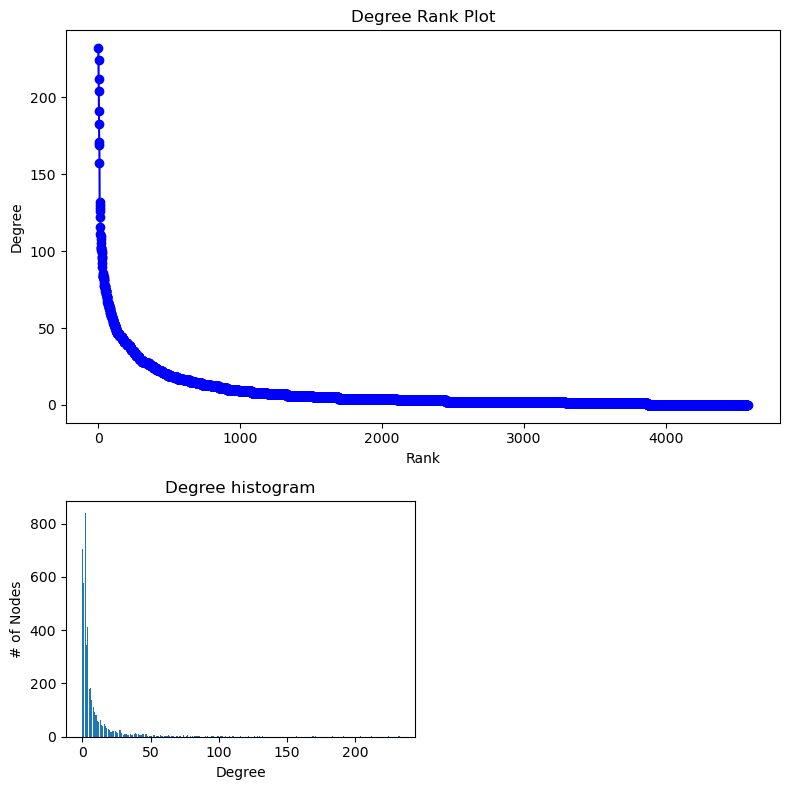

In [15]:
import numpy as np

def compute_nodes_distribution(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)

    fig = plt.figure("Degree of a random graph", figsize=(8, 8))

    ax0 = fig.add_subplot(axgrid[0:3, :])
    ax0.plot(degree_sequence, "b-", marker="o")
    ax0.set_title("Degree Rank Plot")
    ax0.set_ylabel("Degree")
    ax0.set_xlabel("Rank")


    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.bar(*np.unique(degree_sequence, return_counts=True))
    ax1.set_title("Degree histogram")
    ax1.set_xlabel("Degree")
    ax1.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()
    
compute_nodes_distribution(G_missing_edges)    

b) Compute a distribuição de graus para duas redes aleatórias com o mesmo número de nós e não direcionadas, mas uma com p=0,001 e outra com p =0,01.

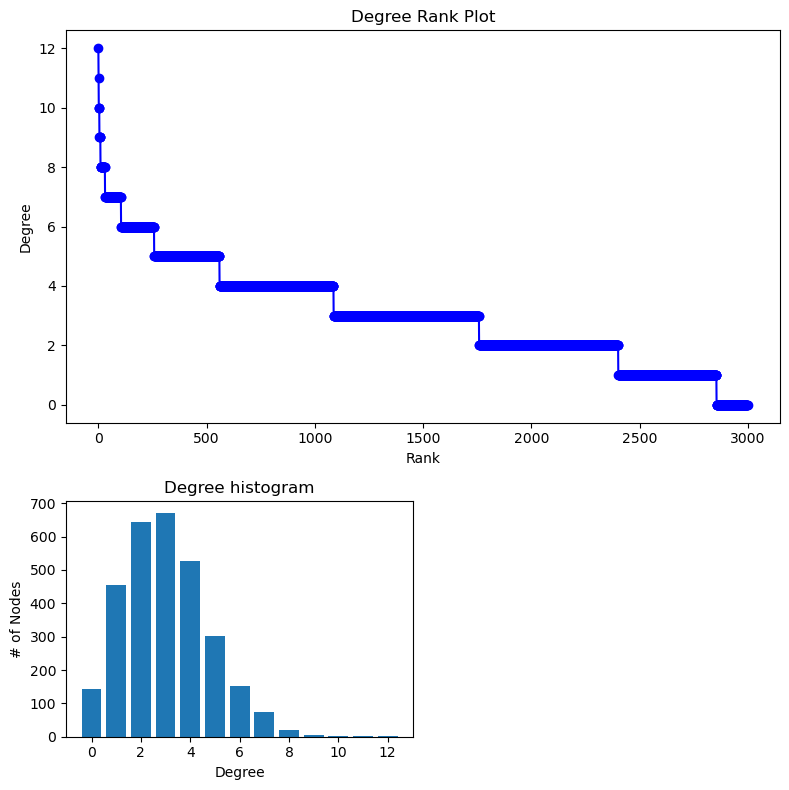

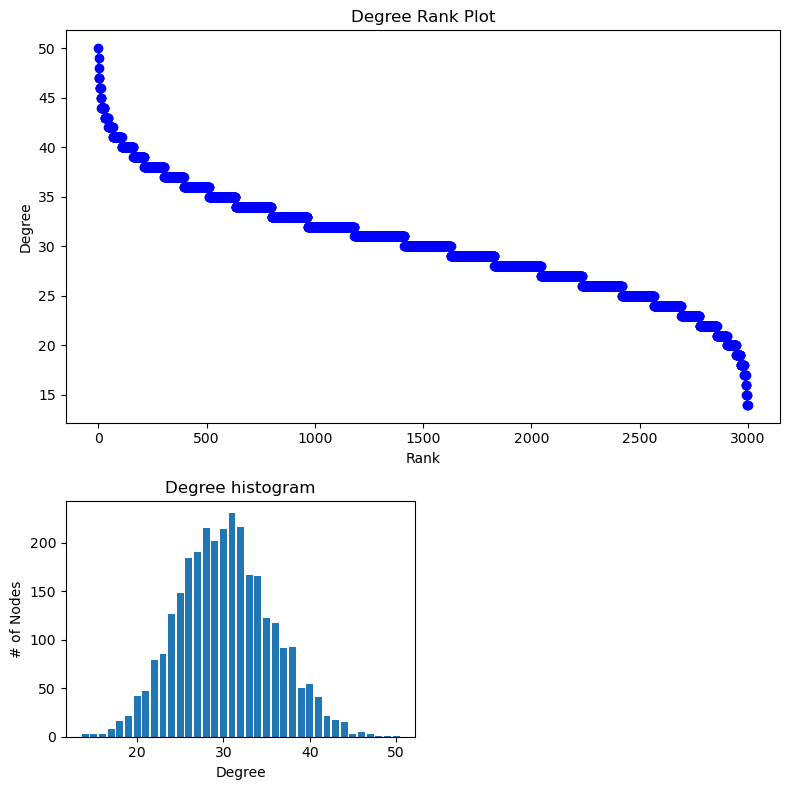

In [16]:
n = 3000
p = 0.001  # probabilidade
seed = 20160 

compute_nodes_distribution(nx.erdos_renyi_graph(n, p, seed=seed))

p = 0.01

compute_nodes_distribution(nx.erdos_renyi_graph(n, p, seed=seed))

c) A rede do desafio possui características de redes aleatórias? Justifique a sua resposta.

Na minha opinião, não. As redes aleatórias possuem  distribuição binomial que tende à normalidade e mais estreita conforme a rede aumenta, ao passo que na rede do desafio, a distribuição possui a cauda mais à direita (assimetria positiva). Esta diferença também é notada no gráfico "Rank plot" aonde a curva da rede do desafio chega a um platô e não possui "degraus", diferentemente das aleatórias.